$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [29]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization, Activation, Dropout


## `+` Load & Preprocess CIFAR 10 Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

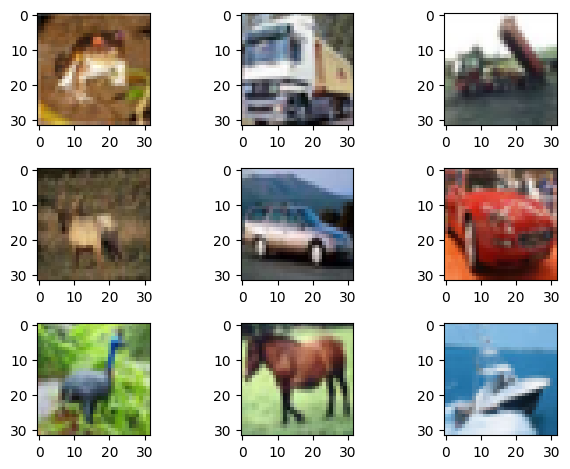

In [5]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.xticks(range(0, 40, 10))
    plt.imshow(X_train[i])
plt.tight_layout()
plt.show()
    

### Feature Rescaling

In [7]:
# Rescale Input
X_train = X_train / 255.0
X_test  = X_test / 255.0

### OneHotEncode Target Variable

In [8]:
### OneHotEncode Target Variable
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test  = encoder.fit_transform(y_test).toarray()

## `+` Set Global Parameters

In [47]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 50
LEARNING_RATE = 0.001

## `i` Trial no. 1

### Model Training

In [52]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,338 (778.66 KB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 128 (512.00 B)

In [53]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])

In [54]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - Precision: 0.5658 - accuracy: 0.3047 - loss: 1.9728
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.6523 - accuracy: 0.4180 - loss: 1.6443
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.6859 - accuracy: 0.4534 - loss: 1.5493
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.6946 - accuracy: 0.4739 - loss: 1.4807
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.6949 - accuracy: 0.4875 - loss: 1.4373
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Precision: 0.7060 - accuracy: 0.5015 - loss: 1.4068
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Precision: 0.7104 - accuracy: 0.5128 - loss: 1.3684
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Precision: 0.7134 - accuracy: 0.5202 - loss: 1.3483
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.7263 - accuracy: 0.5299 - loss: 1.3203
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5m

Epoch 1/50
352/352 [==============================] - 5s 10ms/step - loss: 1.7998 - accuracy: 0.3609 - val_loss: 1.5823 - val_accuracy: 0.4410
Epoch 2/50
352/352 [==============================] - 2s 7ms/step - loss: 1.5574 - accuracy: 0.4437 - val_loss: 1.4360 - val_accuracy: 0.4870
Epoch 3/50
352/352 [==============================] - 3s 8ms/step - loss: 1.4652 - accuracy: 0.4765 - val_loss: 1.3739 - val_accuracy: 0.5122
Epoch 4/50
352/352 [==============================] - 2s 7ms/step - loss: 1.4025 - accuracy: 0.5006 - val_loss: 1.3361 - val_accuracy: 0.5264
Epoch 5/50
352/352 [==============================] - 2s 7ms/step - loss: 1.3561 - accuracy: 0.5157 - val_loss: 1.3087 - val_accuracy: 0.5336
Epoch 6/50
352/352 [==============================] - 2s 7ms/step - loss: 1.3089 - accuracy: 0.5336 - val_loss: 1.2999 - val_accuracy: 0.5388
Epoch 7/50
352/352 [==============================] - 2s 7ms/step - loss: 1.2737 - accuracy: 0.5458 - val_loss: 1.2884 - val_accuracy: 0.5394
Epoch

### Model Evaluation

In [57]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy: {accuracy}")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {accuracy}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Precision: 0.6802 - accuracy: 0.5471 - loss: 1.2849


ValueError: too many values to unpack (expected 2)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4957 - accuracy: 0.8452
Accuracy for training: 84.52
313/313 [==============================] - 1s 3ms/step - loss: 1.4079 - accuracy: 0.5474
Accuracy for testing: 54.74


### Result Visualization

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

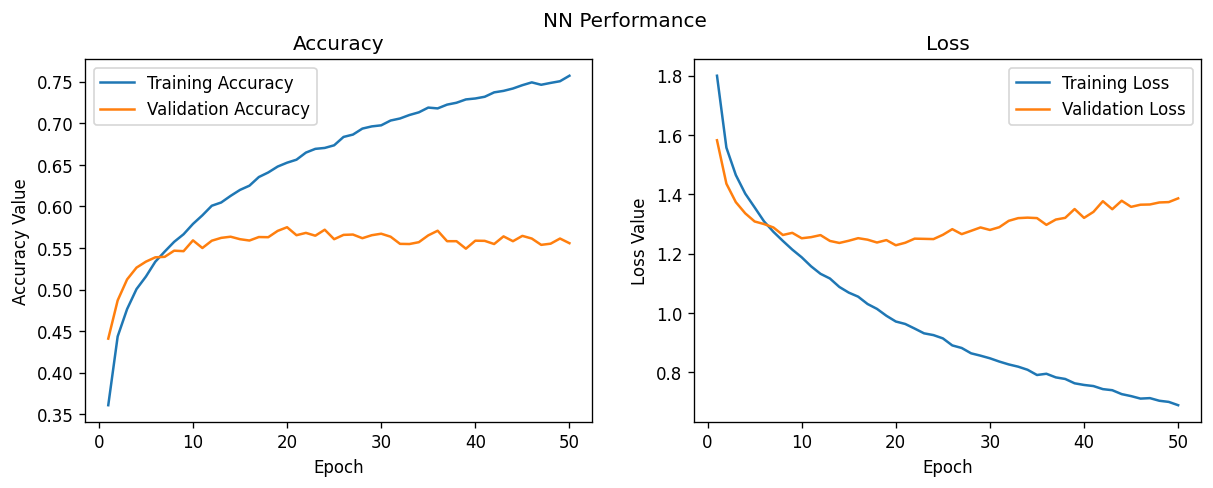

In [ ]:
# Plot the training and validation accuracy and loss


## `ii` Trial no. 2

### Model Training

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
352/352 [==============================] - 4s 9ms/step - loss: 1.7813 - accuracy: 0.3637 - val_loss: 1.5722 - val_accuracy: 0.4334
Epoch 2/50
352/352 [==============================] - 2s 7ms/step - loss: 1.5506 - accuracy: 0.4435 - val_loss: 1.4448 - val_accuracy: 0.4808
Epoch 3/50
352/352 [==============================] - 2s 7ms/step - loss: 1.4682 - accuracy: 0.4766 - val_loss: 1.4182 - val_accuracy: 0.4920
Epoch 4/50
352/352 [==============================] - 2s 7ms/step - loss: 1.4069 - accuracy: 0.4994 - val_loss: 1.3633 - val_accuracy: 0.5120
Epoch 5/50
352/352 [==============================] - 2s 7ms/step - loss: 1.3613 - accuracy: 0.5142 - val_loss: 1.3369 - val_accuracy: 0.5208
Epoch 6/50
352/352 [==============================] - 3s 10ms/step - loss: 1.3265 - accuracy: 0.5279 - val_loss: 1.3168 - val_accuracy: 0.5246
Epoch 7/50
352/352 [==============================] - 2s 7ms/step - loss: 1.2940 - accuracy: 0.5384 - val_loss: 1.3069 - val_accuracy: 0.5412
Epoch

### Model Evaluation

1563/1563 [==============================] - 5s 3ms/step - loss: 0.5660 - accuracy: 0.8172
Accuracy for training: 81.72
313/313 [==============================] - 1s 3ms/step - loss: 1.3642 - accuracy: 0.5528
Accuracy for testing: 55.28


### Result Visualization

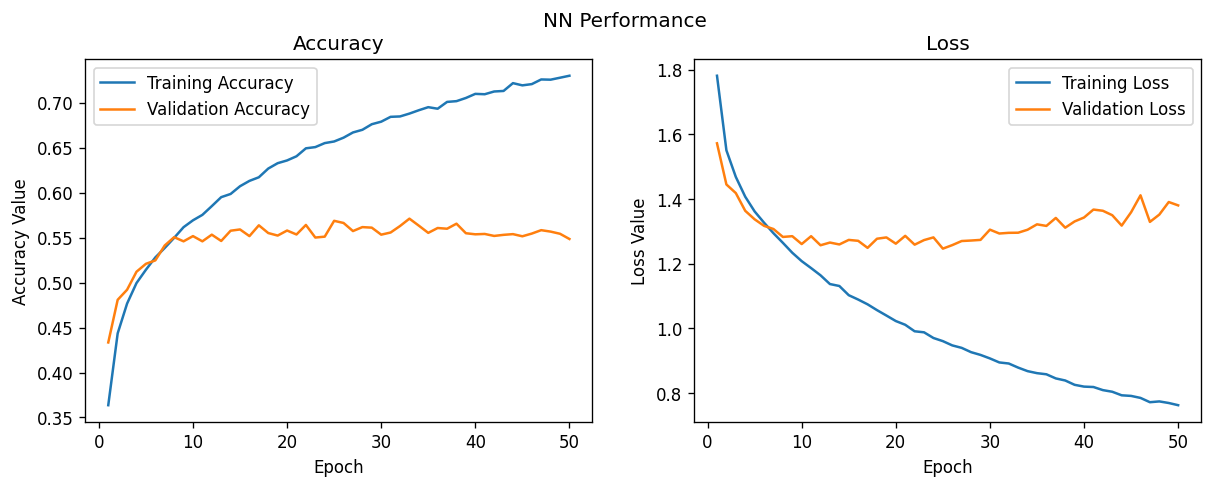

In [ ]:
# Plot the training and validation accuracy and loss


**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# Assignment 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

Epoch 1/50
704/704 [==============================] - 8s 9ms/step - loss: 1.6113 - accuracy: 0.4253 - val_loss: 1.2268 - val_accuracy: 0.5500
Epoch 2/50
704/704 [==============================] - 7s 9ms/step - loss: 1.1479 - accuracy: 0.5915 - val_loss: 1.0038 - val_accuracy: 0.6464
Epoch 3/50
704/704 [==============================] - 7s 10ms/step - loss: 0.9560 - accuracy: 0.6647 - val_loss: 0.8473 - val_accuracy: 0.7050
Epoch 4/50
704/704 [==============================] - 6s 9ms/step - loss: 0.8452 - accuracy: 0.7073 - val_loss: 0.7479 - val_accuracy: 0.7434
Epoch 5/50
704/704 [==============================] - 6s 9ms/step - loss: 0.7650 - accuracy: 0.7364 - val_loss: 0.7260 - val_accuracy: 0.7538
Epoch 6/50
704/704 [==============================] - 6s 9ms/step - loss: 0.7016 - accuracy: 0.7585 - val_loss: 0.6414 - val_accuracy: 0.7808
Epoch 7/50
704/704 [==============================] - 7s 10ms/step - loss: 0.6539 - accuracy: 0.7761 - val_loss: 0.6153 - val_accuracy: 0.7854
Epoc

### Model Evaluation

1563/1563 [==============================] - 6s 4ms/step - loss: 0.1030 - accuracy: 0.9700
Accuracy for training: 97.00
313/313 [==============================] - 1s 4ms/step - loss: 0.5051 - accuracy: 0.8571
Accuracy for testing: 85.71


### Result Visualization

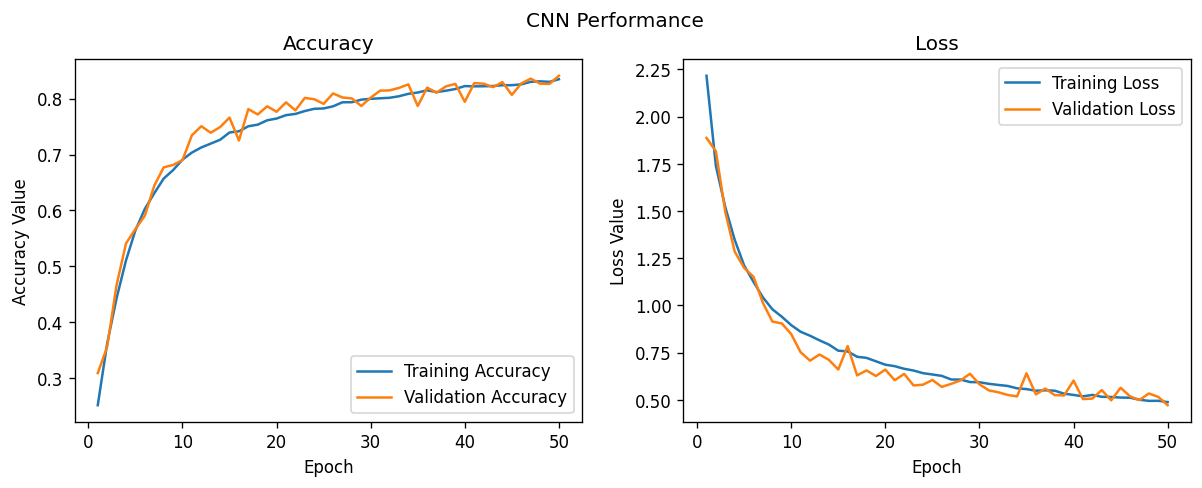

In [ ]:
# Plot the training accuracy and loss


## `ii` Trial no. 2

### Model Training

Epoch 1/50
704/704 [==============================] - 8s 9ms/step - loss: 1.4561 - accuracy: 0.4877 - val_loss: 1.5101 - val_accuracy: 0.4802
Epoch 2/50
704/704 [==============================] - 5s 7ms/step - loss: 0.9687 - accuracy: 0.6642 - val_loss: 1.9029 - val_accuracy: 0.4542
Epoch 3/50
704/704 [==============================] - 5s 8ms/step - loss: 0.8126 - accuracy: 0.7183 - val_loss: 0.7195 - val_accuracy: 0.7500
Epoch 4/50
704/704 [==============================] - 5s 7ms/step - loss: 0.7225 - accuracy: 0.7521 - val_loss: 0.6046 - val_accuracy: 0.7934
Epoch 5/50
704/704 [==============================] - 5s 8ms/step - loss: 0.6574 - accuracy: 0.7743 - val_loss: 0.7432 - val_accuracy: 0.7562
Epoch 6/50
704/704 [==============================] - 5s 7ms/step - loss: 0.6120 - accuracy: 0.7907 - val_loss: 0.5670 - val_accuracy: 0.8104
Epoch 7/50
704/704 [==============================] - 5s 8ms/step - loss: 0.5721 - accuracy: 0.8038 - val_loss: 0.5521 - val_accuracy: 0.8148
Epoch 

### Model Evaluation

1563/1563 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9726
Accuracy for training: 97.26
313/313 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.8569
Accuracy for testing: 85.69


### Result Visualization

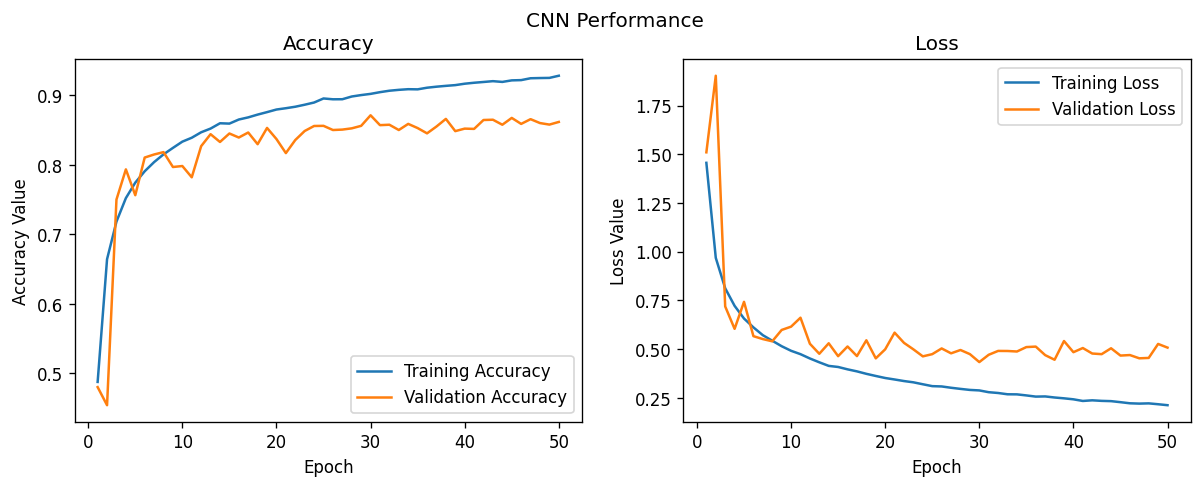

In [ ]:
# Plot the training accuracy and loss


---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) =

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [ ]:
y_train =
y_test =

### Preview the Images

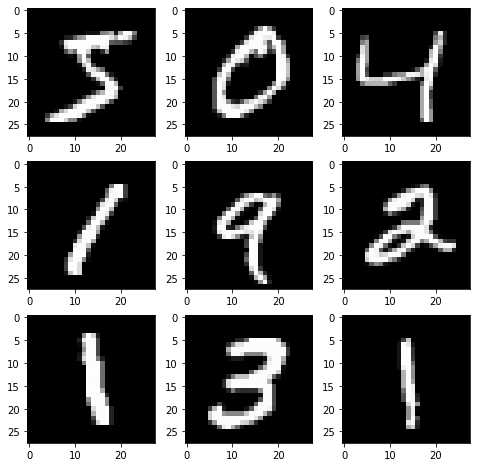

In [ ]:
# plot first few images


### Rescale Independent Features

In [ ]:
# Rescale the Input
X_train =
X_test =

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  =
NUM_CLASSES =
EPOCHS      =

## `i` ANN Trials

### Trial no. 1

#### Model Training

Epoch 1/50
844/844 [==============================] - 7s 7ms/step - loss: 0.2758 - accuracy: 0.9150 - val_loss: 0.1000 - val_accuracy: 0.9693
Epoch 2/50
844/844 [==============================] - 5s 6ms/step - loss: 0.1495 - accuracy: 0.9533 - val_loss: 0.0907 - val_accuracy: 0.9743
Epoch 3/50
844/844 [==============================] - 6s 7ms/step - loss: 0.1163 - accuracy: 0.9639 - val_loss: 0.0778 - val_accuracy: 0.9753
Epoch 4/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0930 - accuracy: 0.9698 - val_loss: 0.0688 - val_accuracy: 0.9800
Epoch 5/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0806 - accuracy: 0.9746 - val_loss: 0.0677 - val_accuracy: 0.9805
Epoch 6/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0730 - accuracy: 0.9772 - val_loss: 0.0680 - val_accuracy: 0.9828
Epoch 7/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0624 - val_accuracy: 0.9840
Epoch 

#### Model Ealuation

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.9983
Accuracy for training: 99.83
313/313 [==============================] - 2s 5ms/step - loss: 0.0863 - accuracy: 0.9829
Accuracy for testing: 98.29


#### Result Visualization

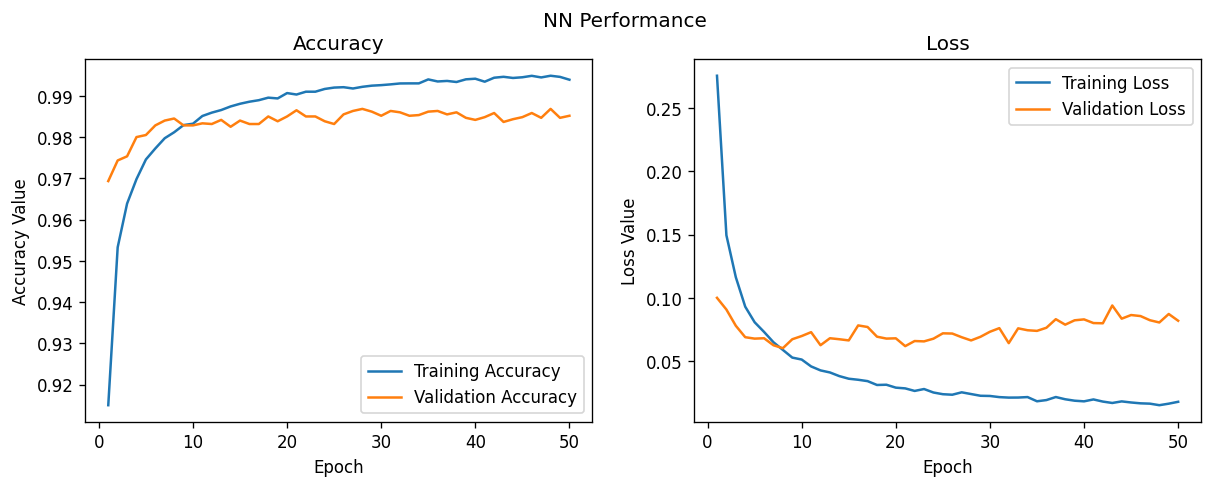

In [ ]:
# Plot the training accuracy and loss


### Trial no. 2

#### Model Training

Epoch 1/50
844/844 [==============================] - 8s 8ms/step - loss: 0.2916 - accuracy: 0.9120 - val_loss: 0.1005 - val_accuracy: 0.9718
Epoch 2/50
844/844 [==============================] - 7s 8ms/step - loss: 0.1635 - accuracy: 0.9515 - val_loss: 0.0900 - val_accuracy: 0.9748
Epoch 3/50
844/844 [==============================] - 6s 7ms/step - loss: 0.1282 - accuracy: 0.9625 - val_loss: 0.0756 - val_accuracy: 0.9807
Epoch 4/50
844/844 [==============================] - 6s 8ms/step - loss: 0.1086 - accuracy: 0.9674 - val_loss: 0.0782 - val_accuracy: 0.9793
Epoch 5/50
844/844 [==============================] - 7s 8ms/step - loss: 0.1008 - accuracy: 0.9694 - val_loss: 0.0778 - val_accuracy: 0.9813
Epoch 6/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0917 - accuracy: 0.9730 - val_loss: 0.0727 - val_accuracy: 0.9823
Epoch 7/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0849 - accuracy: 0.9756 - val_loss: 0.0727 - val_accuracy: 0.9810
Epoch 

#### Model Evaluation

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9979
Accuracy for training: 99.79
313/313 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9838
Accuracy for testing: 98.38


#### Result Visualization

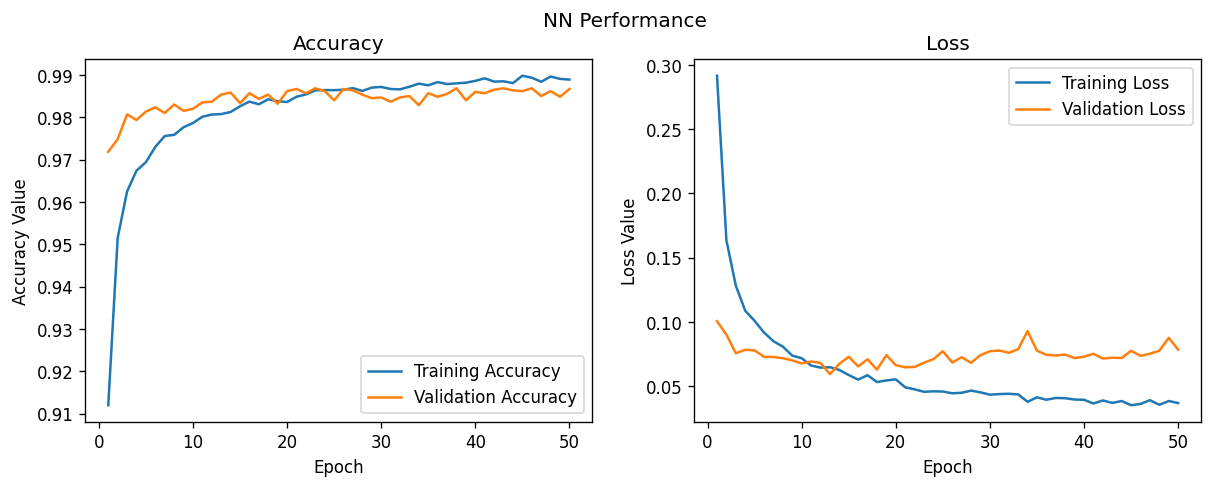

In [ ]:
# Plot the training accuracy and loss


## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train =
X_test =
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

Epoch 1/50
844/844 [==============================] - 12s 12ms/step - loss: 0.1725 - accuracy: 0.9469 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 2/50
844/844 [==============================] - 10s 12ms/step - loss: 0.0665 - accuracy: 0.9799 - val_loss: 0.0661 - val_accuracy: 0.9850
Epoch 3/50
844/844 [==============================] - 10s 12ms/step - loss: 0.0518 - accuracy: 0.9846 - val_loss: 0.0417 - val_accuracy: 0.9882
Epoch 4/50
844/844 [==============================] - 10s 11ms/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.0310 - val_accuracy: 0.9912
Epoch 5/50
844/844 [==============================] - 11s 13ms/step - loss: 0.0389 - accuracy: 0.9886 - val_loss: 0.0218 - val_accuracy: 0.9935
Epoch 6/50
844/844 [==============================] - 10s 12ms/step - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0326 - val_accuracy: 0.9918
Epoch 7/50
844/844 [==============================] - 10s 12ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.0207 - val_accuracy:

#### Model Evaluation

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0029 - accuracy: 0.9995
Accuracy for training: 99.95
313/313 [==============================] - 1s 4ms/step - loss: 0.0216 - accuracy: 0.9956
Accuracy for testing: 99.56


#### Result Visualization

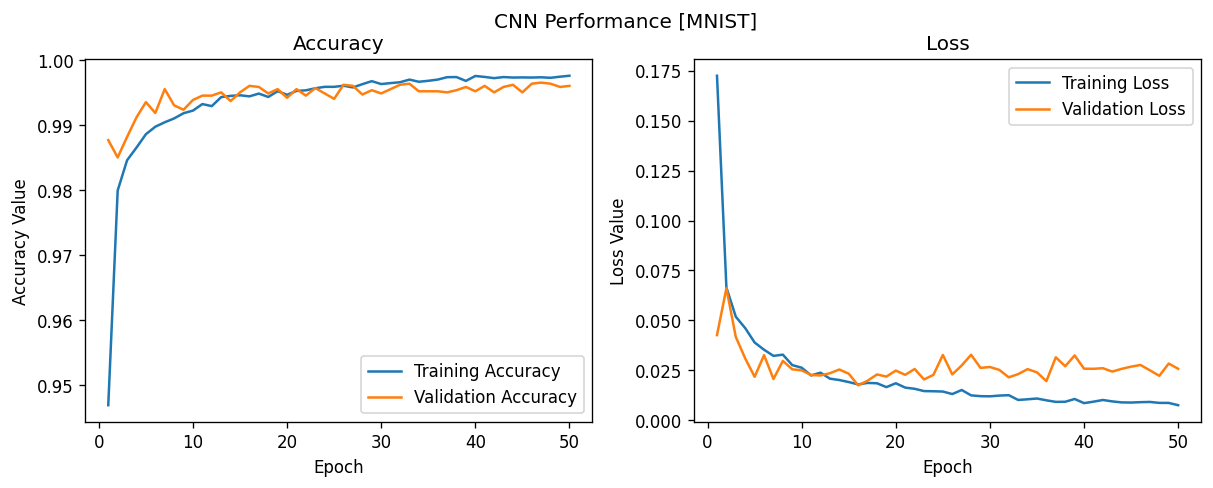

In [ ]:
# Plot the training accuracy and loss


### Trial no. 2

#### Model Training

Epoch 1/50
844/844 [==============================] - 7s 8ms/step - loss: 0.2117 - accuracy: 0.9356 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 2/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 3/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.0229 - val_accuracy: 0.9925
Epoch 4/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0283 - val_accuracy: 0.9918
Epoch 5/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0238 - val_accuracy: 0.9933
Epoch 6/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 7/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0219 - val_accuracy: 0.9933
Epoch 

#### Model Evaluation

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0027 - accuracy: 0.9995
Accuracy for training: 99.95
313/313 [==============================] - 1s 5ms/step - loss: 0.0167 - accuracy: 0.9965
Accuracy for testing: 99.65


#### Result Visualization

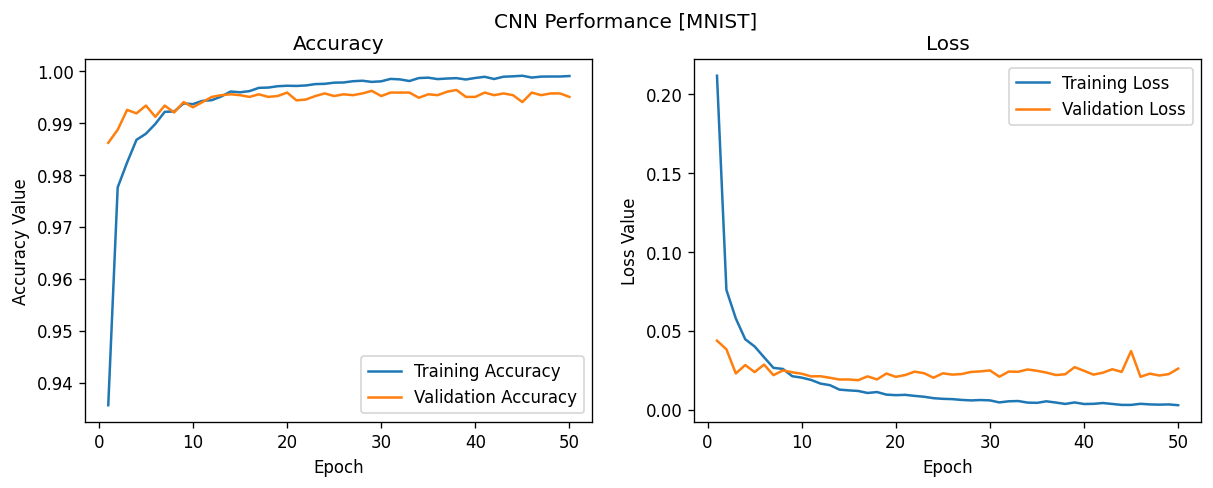

In [ ]:
# Plot the training accuracy and loss


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$